In [31]:
import json
path= 'usagov_bitly_data2012-03-16-1331923249.txt'
open(path).readline()
records = [json.loads(line) for line in open(path)]

In [19]:
%matplotlib inline

In [37]:
records[8]

{'a': 'Opera/9.80 (X11; Linux zbov; U; en) Presto/2.10.254 Version/12.00',
 'al': 'en-US, en',
 'c': None,
 'g': 'wcndER',
 'h': 'zkpJBR',
 'hc': 1331922854,
 'hh': '1.usa.gov',
 'l': 'bnjacobs',
 'nk': 0,
 'r': 'http://www.facebook.com/l.php?u=http%3A%2F%2F1.usa.gov%2FzkpJBR&h=fAQG5ntSGAQHqKPlWzuJKUA9LYeckHZCUxvjQipJDd7Rmmw',
 't': 1331923254,
 'tz': '',
 'u': 'http://www.nasa.gov/mission_pages/nustar/main/index.html'}

In [38]:
print(records[1]['tz'])

America/Denver


In [39]:
# Counting time zones
#time_zones = [rec['tz'] for rec in records]
# check if 'tx' in rec at the end of list comprehension
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [40]:
# Create a function to produce counts
def get_counts(sequence):
    counts={}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [22]:
sequence = ["a","a","d","d","d","f","u","u"]
get_counts(sequence)      

{'a': 2, 'd': 3, 'f': 1, 'u': 2}

In [23]:
# Alternate method
from collections import defaultdict
def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [24]:
get_counts2(sequence)

defaultdict(int, {'a': 2, 'd': 3, 'f': 1, 'u': 2})

In [ ]:
counts = get_counts(time_zones)
counts['America/New_York']
len(time_zones)

In [44]:
# get top 10 time zones
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [45]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [47]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [46]:
# Counting with pandas
from pandas import DataFrame, Series
import pandas as pd

frame= DataFrame(records)

In [51]:
frame['tz'][:10]


0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [52]:
tz_counts = frame['tz'].value_counts()

In [54]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [55]:
# fill in missing NA values
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [58]:
tz_counts[:10].plot(kind='barh', rot=0)


AttributeError: 'AxesSubplot' object has no attribute 'show'

In [63]:
results = Series([x.split()[0] for x in frame.a.dropna()])
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [60]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [67]:
# exclude missing agents
import numpy as np
cframe = frame[frame.a.notnull()]
operating_system = np.where(cframe['a'].str.contains('Windows'), 'Windows','Not Windows')
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'],
      dtype='<U11')

In [68]:
by_tz_os = cframe.groupby(['tz', operating_system])

In [69]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [70]:
# select top overall time zones
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [72]:
count_subset = agg_counts.take(indexer)[-10:]
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


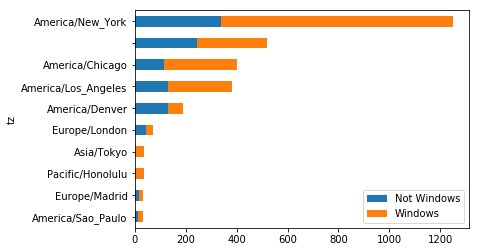

In [77]:
count_subset.plot(kind='barh',stacked=True)

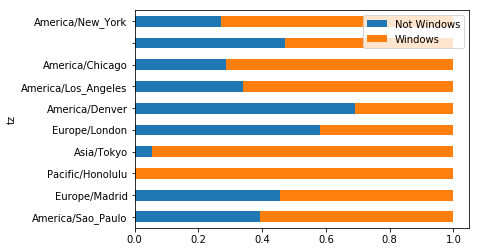

In [76]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True)

# MovieLens 1M DataSet

In [1]:
import pandas as pd


In [2]:
unames = ['user_id','gender','age','occupation','zip']
users = pd.read_table('ml-1m/users.dat', sep='::', header=None, names = unames)

C:\Users\JohntheGreat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [3]:
rnames = ['user_id','movie_id','rating','timestamp']
ratings = pd.read_table('ml-1m/ratings.dat',sep='::', header=None, names=rnames)

C:\Users\JohntheGreat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [13]:
mnames = ['movie_id', 'title','genres']
movies= pd.read_table('ml-1m/movies.dat', sep='::', header=None, names=mnames)

C:\Users\JohntheGreat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [9]:
# verify by looking at first few rows
users[:5]



,movied_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
ratings[:5]


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [14]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [21]:
# merging tables together
data = pd.merge(pd.merge(ratings, users),movies)
data.head()


,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [20]:
# pivot table method to get mean movie ratings for each film grouped by gender
mean_ratings = data.pivot_table('rating', index='title',columns='gender',aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [22]:
ratings_by_title = data.groupby('title').size()
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [24]:
active_titles = ratings_by_title.index[ratings_by_title >=250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [26]:
# use the index of active titles to select rows from mean_ratings
mean_ratings = mean_ratings.ix[active_titles]
mean_ratings

C:\Users\JohntheGreat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


In [29]:
# sort the f column in descnding order
top_female_ratings=mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [30]:
# Measuring rating disgreement by sex
# add a difference column
mean_ratings["diff"] = mean_ratings['M']-mean_ratings['F']

In [33]:
# return movies that are preferred by women
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [38]:
# reverse the order of the rows, to return the movies preferred by men
sorted_by_diff[::-1][:15]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [42]:
# Find the movies that caused the most disagreement. measured by standard deviation of the ratings
rating_std_by_title = data.groupby('title')['rating'].std()
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title.order(ascending=False)[:10]


AttributeError: 'Series' object has no attribute 'order'

# US Baby Names 1880-2010

In [1]:
import pandas as pd


In [2]:
names1880 = pd.read_csv('yob1880.txt', sep=',',names=['names','sex','births'])
names1880.head()

,names,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [3]:
names1880.groupby('sex').births.sum()

sex
F     90992
M    110491
Name: births, dtype: int64

In [5]:
#  assemble all of the birth data into one dataframe and add a "year" column
years=range(1880,2011)
pieces=[]
columns = ['name','sex','births']
# loop through each csv, extract data and add year as a column
for year in years:
    path='names/yob%d.txt' % year
    frame = pd.read_csv(path, names = columns)
    frame['year'] = year
    pieces.append(frame)
# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [11]:
len(names)

1691896

In [16]:
# sum births by year, rows are year, columns are each gender
total_births = names.pivot_table('births', index='year',columns='sex',aggfunc=sum)

In [17]:
total_births.tail()

sex,F,M
year,,
2006,1899166,2053065
2007,1920231,2072975
2008,1888177,2037309
2009,1834048,1980491
2010,1774186,1915331


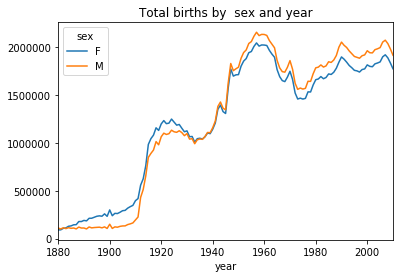

In [20]:
total_births.plot(title='Total births by  sex and year')

In [21]:
# add a new column 'prop' to show the proportion of births for a given name in a year
def add_prop(group):
    births = group.births.astype(float)
    group['prop'] = births/births.sum()
    return group
names = names.groupby(['year','sex']).apply(add_prop)
    

In [25]:
names.groupby(['year','sex']).head(10)

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077644
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021310
4,Minnie,F,1746,1880,0.019189
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [28]:
import numpy as np

In [29]:
# returns True, shows that all groups by year/sex sum to 1
np.allclose(names.groupby(['year','sex']).prop.sum(),1)

True

In [31]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)

In [32]:
top1000.head()

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077644
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021310
         4     Minnie   F    1746  1880  0.019189

In [33]:
# different approach
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000=pd.concat(pieces, ignore_index=True)

In [36]:
# Analyzing Naming Trends
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [38]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A67AF6278>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000021A66D652B0>], dtype=object)

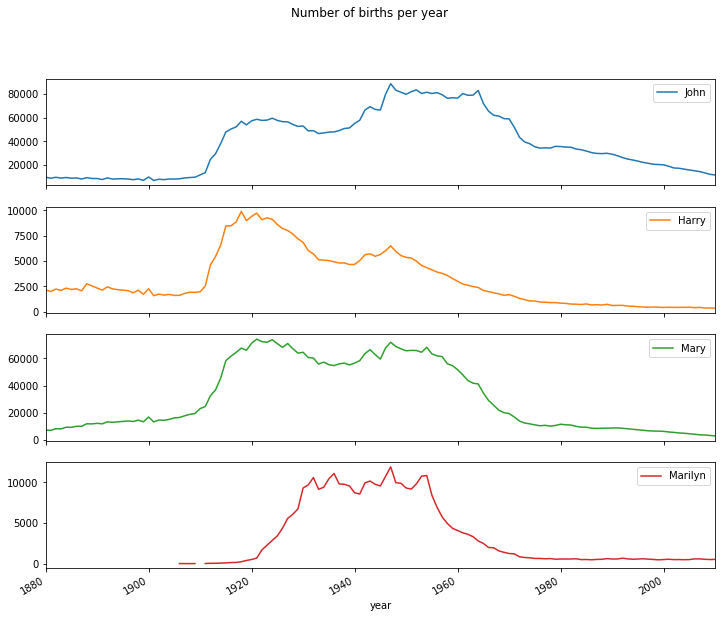

In [39]:
subset = total_births[['John','Harry','Mary','Marilyn']]
subset.plot(subplots=True, figsize=(12,10), grid=False, title='Number of births per year')

In [40]:
# Measuring the increase in naming diversity
table=top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

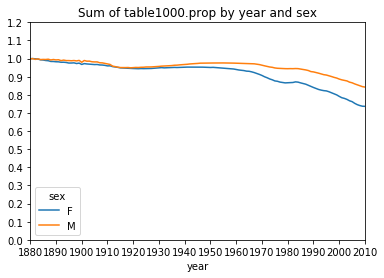

In [43]:
table.plot(title='Sum of table1000.prop by year and sex', \
           yticks=np.linspace(0,1.2,13),xticks=range(1880,2020,10))

In [45]:
df = boys[boys.year == 2010]
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]

260877    0.011544
260878    0.020939
260879    0.029990
260880    0.038951
260881    0.047849
260882    0.056593
260883    0.065178
260884    0.073441
260885    0.081550
260886    0.089633
Name: prop, dtype: float64

In [47]:
df = boys[boys.year ==1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [48]:
in1900.searchsorted(0.5) +1

array([25], dtype=int64)

In [52]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q) +1
diversity = top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity.head()

sex,F,M
year,,
1880,[38],[14]
1881,[38],[14]
1882,[38],[15]
1883,[39],[15]
1884,[39],[16]


In [ ]:
diversity.plot(title='Number of popular names in top 50%')

In [56]:
# The Last letter Revolution

# extract last letter from name column
get_last_letter = lambda x:x[-1]
last_letters = names.name.map(get_last_letter)
last_letter.name == 'last_letter'
table = names.pivot_table('births', index=last_letters, columns=['sex','years'], aggfunc=sum)

NameError: name 'last_letter' is not defined

In [57]:
subtable = table.reindex(columns=[1910,1960,2010], level='year')
subtable.head()

KeyError: 'Level year must be same as name (None)'

In [ ]:
# normalize the table
subtable.sum()

NameError: name 'letter_prop' is not defined

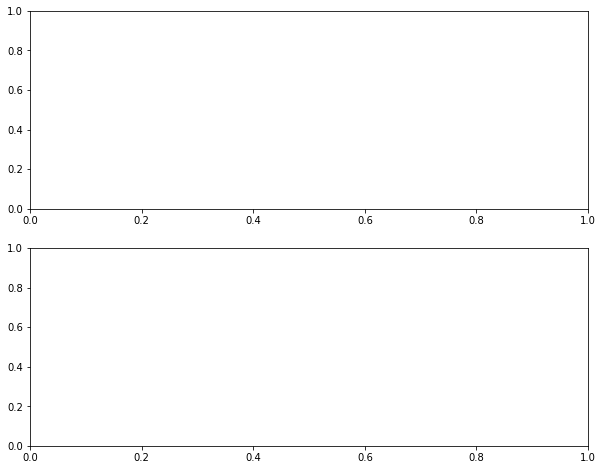

In [58]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,1,figsize=(10,8))
letter_prop['M'].plot(kind='bar', rot=0, ax=asex[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                     legend=False)


In [59]:
letter_prop = table/table.sum().astype(float)
dny_ts = letter_prop.loc[['d','n','y'],'M'].T
dny_ts.head()

KeyError: "None of [['d', 'n', 'y']] are in the [index]"

In [ ]:
dny_ts.plot()

In [62]:
# Boy names that became girl names
all_names=top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [64]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee       993
Lesley     35032
Lesli        929
Leslie    370562
Lesly      10072
Name: births, dtype: int64

In [67]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc=sum)
table=table.div(table.sum(1), axis=0)
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


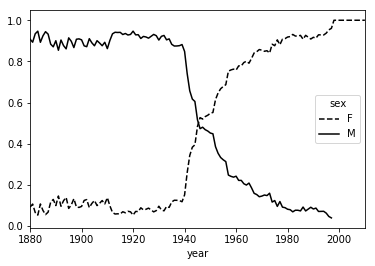

In [68]:
table.plot(style={'M':'k-', 'F':'k--'})